In [0]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
from torch.autograd import Variable

In [0]:
from keras.datasets import mnist

In [0]:


def PlotParameters(model):
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
         
         
            ax.set_xlabel("class: {0}".format(i))
            
            
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')
            
            ax.set_xticks([])
            ax.set_yticks([])
 
 
 
    plt.show()

In [0]:
def show_data(data_sample):
  plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
  plt.title('y = ' + str(data_sample[1].item()))

In [85]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [111]:
train_dataset


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [86]:
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [110]:
print("Type of data element: ", train_dataset[0][1].type())

AttributeError: ignored

In [88]:
# Print the label


print("The label: ", train_dataset[3][1])

The label:  1


In [94]:
# Plot the image

print("The image: ", show_data(train_dataset[3][1]))

TypeError: ignored

In [0]:
# Define softmax classifier class

class SoftMax(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        z = self.linear(x)
        return z

In [96]:
# Print the shape of train dataset

train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [0]:
# Set input size and output size

input_dim = 28 * 28
output_dim = 10

In [98]:
# Create the model

model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [99]:
# Print the parameters

print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


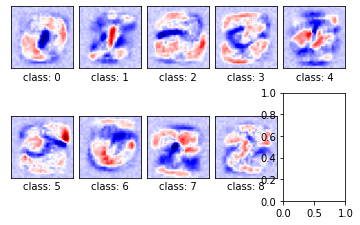

In [113]:
# Plot the model parameters for each class

PlotParameters(model)

In [0]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [0]:
n_epochs=10
loss_list=[]
accuracy_list=[]
N_test = len(validation_dataset)

def train_model(n_epochs):
  for epoch in range(n_epochs):
    for x, y in train_loader:
      optimizer.zero_grad()
      z = model(x.view(-1,28*28))
      loss = criterion(z, y)
      loss.backward()
      optimizer.step()
    
    correct = 0
    for x_test, y_test in validation_loader:
      z = model(x_test.view(-1,28*28))
      _, yhat = torch.max(z.data, 1)
      correct +=(yhat == y_test).sum().item()
      accuracy = correct/N_test
      loss_list.append(loss.data)
      accuracy_list.append(accuracy)

train_model(n_epochs)

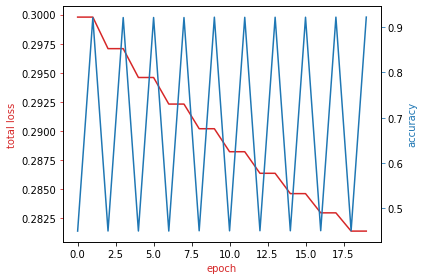

In [104]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('total loss', color=color)
ax1.tick_params(axis='y', color=color)

ax2= ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot(accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()


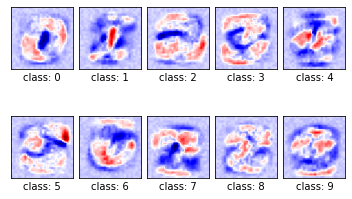

In [105]:
PlotParameters(model)

AttributeError: ignored

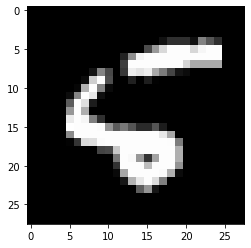

In [107]:
Softmax_fn = nn.Softmax(dim=1)
count=0
for x, y in validation_dataset:
  z = model(x.reshape(-1, 28*28))
  _, yhat= torch.max(z,1)
  if yhat !=y:
    show_data((x,y))
    plt.show()
    print("yhat:", yhat)
    print("probability of class ", torch.max(Softmax_fn(x)).item())
    count += 1
  if count >= 5:
    break

AttributeError: ignored

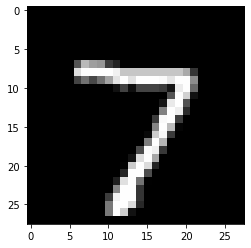

In [108]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break  